# Neural Networks

The task we need to accomplish consists in recognizing handwritten digits (0 to 9).

We have already experimented with this challenge with Regularized Logistic Regression getting a global model accuracy of around 80.4%. We are going to implement a Neural Network end to end and see if we can beat the previous result. We will actually follow two steps:

1. Implement Feed Forward Progragation and run a NN with pre-trained weights
2. Implement the whole algorithm, hence Feed Forward Propagation (defining the relation between predictors and output) plus Back Propagation (which will enable us to learn the weights defined in the first step).

### NN Representation: Forward Propagation

<img src="img/NN.png" alt="Neural Network representation" style="width: 400px;"/>

In [8]:
import scipy.io as sio
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Functions

In [141]:
def displayData(X):
    fig = plt.figure(figsize=(8,8))
    plt.title('100 Random Images from the data set')
    indexes = random.sample(range(1, X.shape[0]), 100)
    images = X[indexes,:]
    for i in np.arange(10):
        for j in np.arange(10):
            ax = fig.add_subplot(10, 10, (10*j+i)+1)
            ax.matshow(images[10*j+i,:].reshape(20,20), cmap = 'gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

    
def displaySigleDigit(X):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(X.reshape(20,20), cmap = 'gray')
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.title('1 Random Digit from the data set')
    plt.show()
    

def sigmoid(z):
    return 1/(1+np.exp(-z))


# Predict the label of an input given a trained neural network.
#   p = predict(Theta1, Theta2, X) outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    # value to return
    predictions = np.zeros((m, 1))
    # add bias therm for first layer
    a1 = np.c_[np.ones((m, 1)), X]
    
    # calculate a2 using sigmoid function
    a2 = sigmoid(Theta1.dot(a1.T)).T
    # add bias therm for second layer
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2]
    
    # calculate output (h == a3)
    h = sigmoid(a2.dot(Theta2.T))
    
    # calculate prediction choosing the index of max argument for each row
    predictions = np.argmax(h, axis=1) + 1
    
    return predictions

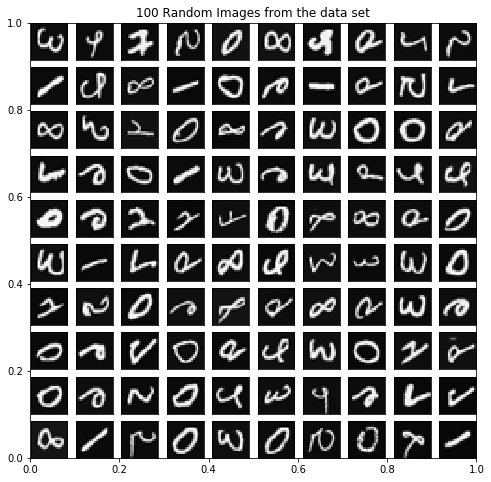

In [189]:
displayData(X)

Note: we will use some pre-trained weights (Theta1 and Theta2) in this part of exercise since we want just to do the Feed Forward Propagation. In the next section we will learn how to do Back Forward Propagation and hence how to learn the Neural Network weights.

In [187]:
mat = sio.loadmat('ex3data1.mat')
weights = sio.loadmat('ex3weights.mat')
X = mat['X']
y = mat['y']

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

predictions = predict(Theta1, Theta2, X)
print("NN Accuracy: ", (sum(predictions.reshape(-1, 1) == y)[0] / y.shape[0]) * 100, "%")

NN Accuracy:  97.52 %


Here a random digit pictures is picked and Neural Network prediction on that picture is shown. 

Run this cell multiple times to see the effect!

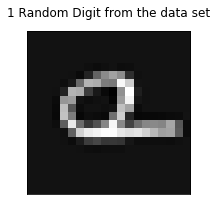

NN prediction:  9


In [188]:
rd = random.randint(0, X.shape[0])
displaySigleDigit(X[rd, :])
prediction = predict(Theta1, Theta2, X[rd, :].reshape(-1, 1).T)
print("NN prediction: ", prediction[0])